*Макарова М.К. 6132-010402D*

# Задание:
1. Загрузить датасет WINE. Использовать только признаки указанные в варианте задания.
2. Подготовить выборки: обучающую 70% и тестовую 30%.
3. Построить дерево решений обеспечивающее наибольшую точность классификации.
4. Построить случайный лес наименьшей высоты обеспечивающий наибольшую точность классификации.
5. Построить оптимальный случайный лес наименьшей высоты и с минимальным количеством деревьев обеспечивающий наибольшую точность классификации.
6. Получить оценку качества классификации с использованием указанных классификаторов.
7. Сравнить результаты классификации и сделать вывод.
8. Все результаты классификации и вывод записать в качестве ответа в текстовое поле. В качестве ответа также разместить ipynb файл.

**Признаки: alcohol, magnesium, total_phenols, hue**


In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [16]:
wine_data = load_wine(as_frame=True)
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = wine_data.target

selected_features = ['alcohol', 'magnesium', 'total_phenols', 'hue']
X_selected = X[selected_features]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

best_tree_acc:  0.9259259259259259
best_depth:  4


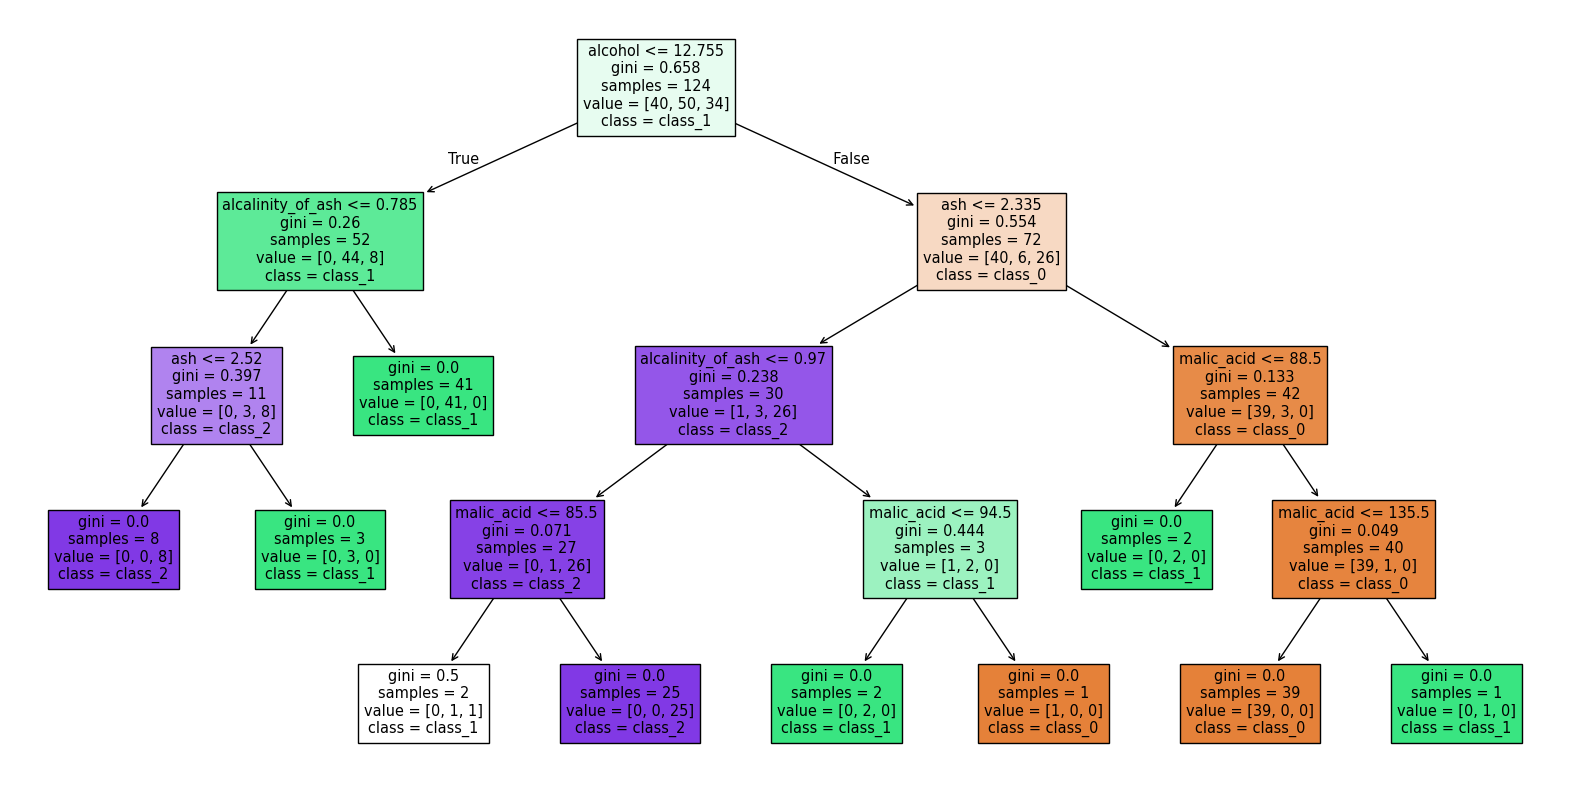

In [22]:
best_depth = None
best_tree_acc = 0
best_tree = None

for depth in range(1, 10):
   clf = DecisionTreeClassifier(max_depth=depth, random_state = 42)
   clf.fit(X_train, y_train)
   clf_pred = clf.predict(X_test)
   clf_acc = accuracy_score(y_test, clf_pred)

   if clf_acc > best_tree_acc:
     best_tree_acc = clf_acc
     best_depth = depth
     best_tree = clf

print('best_tree_acc: ', best_tree_acc)
print('best_depth: ', best_depth)

plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=wine_data.feature_names, class_names=wine_data.target_names, filled=True)
plt.show()

In [25]:
best_forest = None
best_forest_acc = 0
best_forest_depth = None

for depth in range(1, 10):
    forest = RandomForestClassifier(max_depth=depth, random_state=42)
    forest.fit(X_train, y_train)
    forest_acc = accuracy_score(y_test, forest.predict(X_test))
    if forest_acc > best_forest_acc:
        best_forest_acc = forest_acc
        best_forest = forest
        best_forest_depth = depth

print('best_forest_acc: ', best_forest_acc)
print('best_forest_depth: ', best_forest_depth)

best_forest_acc:  0.9074074074074074
best_forest_depth:  4


In [31]:
optimal_forest = None
optimal_forest_acc = 0
optimal_n_estimators = None

for n_estimators in range(10, 101, 10):
    forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_forest_depth, random_state=42)
    forest.fit(X_train, y_train)
    forest_acc = accuracy_score(y_test, forest.predict(X_test))
    if forest_acc > optimal_forest_acc:
        optimal_forest_acc = forest_acc
        optimal_forest = forest
        optimal_n_estimators = n_estimators

print('optimal_forest_acc: ', optimal_forest_acc)
print('optimal_n_estimators: ', optimal_n_estimators)

optimal_forest_acc:  0.9074074074074074
optimal_n_estimators:  70


In [32]:
print('Точность дерева решений', best_tree_acc)
print('Точность случайного леса наименьшей высоты', best_forest_acc)
print('Точность оптимального случайного леса наименьшей высоты и с минимальным количеством деревьев', optimal_forest_acc)

Точность дерева решений 0.9259259259259259
Точность случайного леса наименьшей высоты 0.9074074074074074
Точность оптимального случайного леса наименьшей высоты и с минимальным количеством деревьев 0.9074074074074074
